### 导入csv数据

In [157]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'titanic-data.csv'
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 了解数据
根据导入数据分析,本数据有12个变量,891个样本,变量有
变量及说明和值的类型:

survival	生还与否   0 = No, 1 = Yes  
pclass	   客舱等级   1 = 1st, 2 = 2nd, 3 = 3rd 代表经济地位,1st = Upper,2nd = Middle,3rd = Lower  
sex	Sex	   性别      male,female  
Age	      年龄      如果年龄小于1岁的用分数表示  
sibsp	   亲属数目包括兄弟姐妹和夫妻关系  
parch	   直系亲属数目包括父母  
ticket	   票编号  
fare	   旅客票价  
cabin	   船舱号  
embarked	上船地点  

### 提出问题有哪些因素和生存有关系

### 整理数据
存在数据缺失的有,年龄,舱号,上船地点,  
年龄缺失有891-714=177,用求平均数加减标准差乘以随机数来生成,  
舱号缺失太多而且主观上认为和生存与否关系不是特别明显所以不使用这个参数,  
上船地点缺失不多,以最多的上船地址S来填充  
票号意义不大去掉  

In [158]:
mean_age = df["Age"].mean()
std_age = df["Age"].std()
count_nan_age = df["Age"].isnull().sum()

rand_1 = np.random.randint(mean_age - std_age, mean_age + std_age, size = count_nan_age)
df["Age"][np.isnan(df["Age"])] = rand_1

df = df.drop("Cabin",axis=1)

df.Embarked[df.Embarked.isnull()] = df.Embarked.dropna().mode().values

df = df.drop("Ticket",axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


### 分析数据
查找有哪些因素和生存有关系


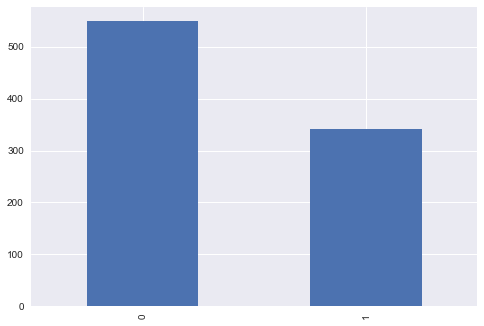

mean= 0.383838383838


In [159]:
# 首先查看生还情况
df.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.show()
print 'mean=' ,df.Survived.mean()

说明:在样本中只有38.4%的人生还遇难旅客数量多

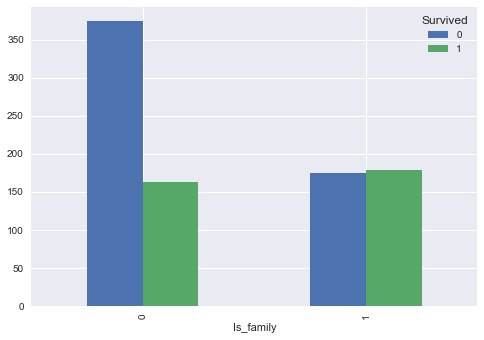

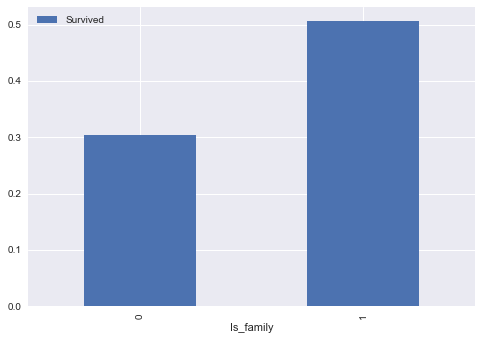

In [160]:
#生存与是否有家人同伴的关系
df['Is_family']=df['SibSp']+df['Parch']
def num_1(x):
    if x>0:
        return 1
    else:
        return 0
df['Is_family'] = df['Is_family'].apply(num_1)
f_df=df[['Is_family','Survived']]
f_df.groupby(['Is_family','Survived'])['Survived'].count().unstack().plot(kind='bar')
f_df.groupby(['Is_family']).mean().plot(kind='bar')
plt.show()

说明:根据是否有家庭成员结果分析,从样本上看无家庭成员的人数比有家庭成员的人数多一些,但是幸存者数量两类人差距不大,所以从样本的生还比例上看有家庭成员的获救比例较高.

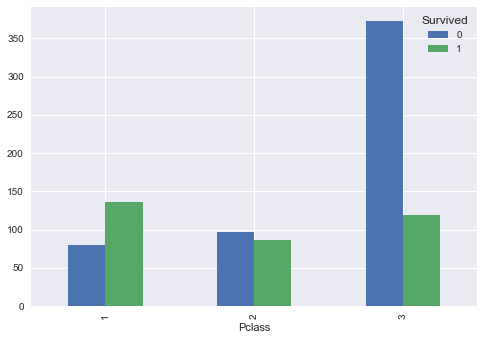

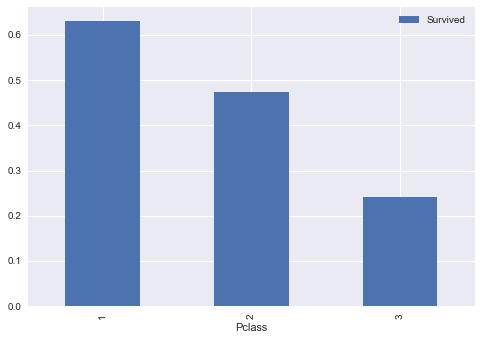

In [161]:
# 单一分析:
# 生存与客舱等级的关系
p_df=df[['Pclass','Survived']]
p_df.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(kind='bar')
p_df.groupby(['Pclass']).mean().plot(kind='bar')
plt.show()

说明:根据从客舱等级与生还结果分析,从样本上看三等舱的总人数最高,生还人数差距不是特别大一等舱生还人数最多,其次是三等舱,最后是二等舱.生还比例上一等舱最高.

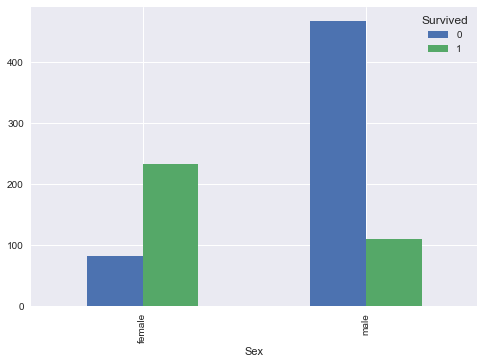

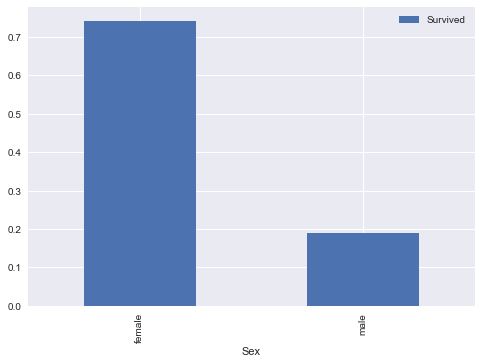

In [162]:
# 生存与性别的关系
s_df=df[["Sex", "Survived"]]
s_df.groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
s_df.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar')
s_df.groupby(['Sex']).mean().plot(kind='bar')
plt.show()

说明:根据从性别与生还结果分析,从样本上看女性总人数少,但是在生还数量上女性多于男性,总体上看女性生还比例比例高于男性生还比率,说明在逃生的时候优先照顾妇女

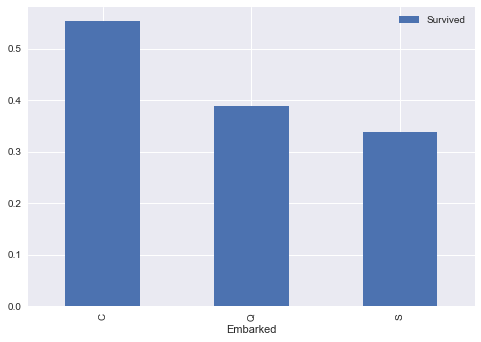

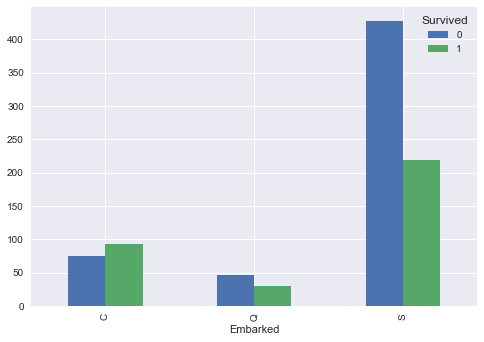

In [163]:
# 生存与上船地点的关系
e_df=df[["Embarked","Survived"]]
e_df.groupby(['Embarked']).mean().plot(kind='bar')
e_df.groupby(['Embarked','Survived'])['Survived'].count().unstack().plot(kind='bar')
plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


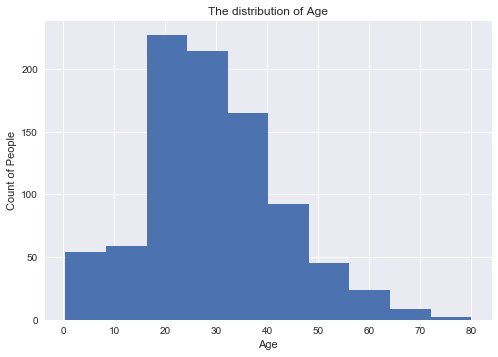

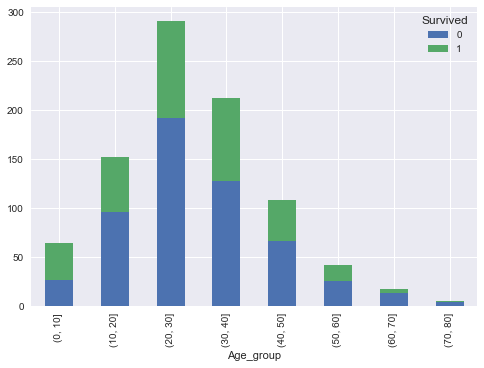

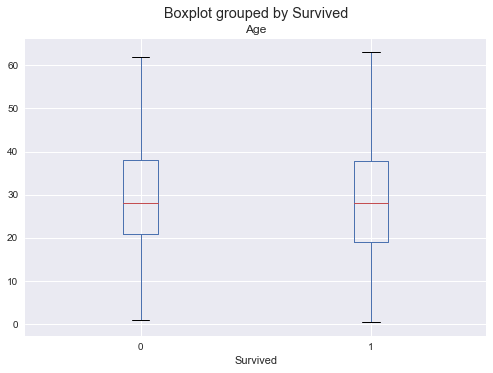

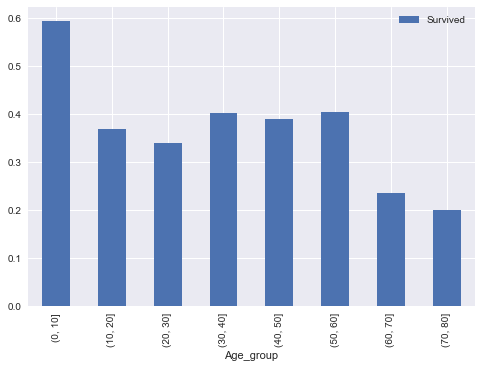

In [164]:
# 生存与年龄的关系
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(df['Age'],bins=10)
plt.title('The distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count of People')
a_df=df[['Age','Survived']]
bins = np.arange(0,90,10)
a_df['Age_group']=pd.cut(a_df['Age'], bins)
a_df.groupby(['Age_group','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)
a_df.boxplot('Age', by='Survived',showfliers = False)
a_df = a_df.drop("Age",axis=1)
a_df.groupby(['Age_group']).mean().plot(kind='bar',stacked=True)
plt.show()

说明:根据从年龄上生还数量来看,除了小于10岁的孩子以外,每个年龄段生还率差距不是特别大,应该当时在逃生的时候优先照顾了儿童.

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


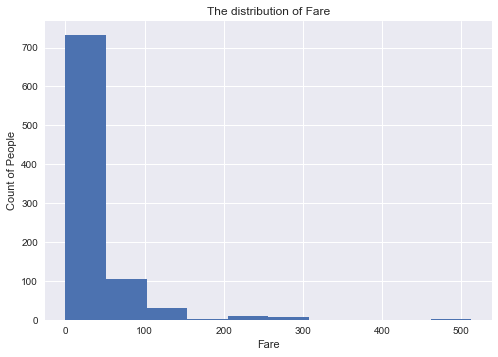

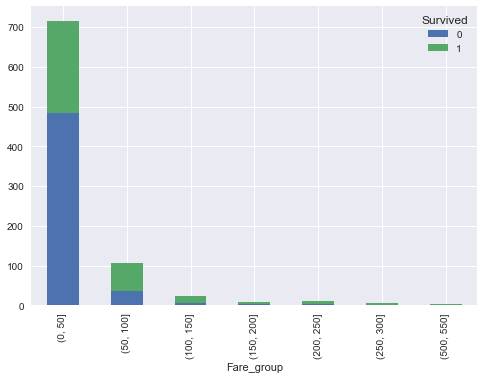

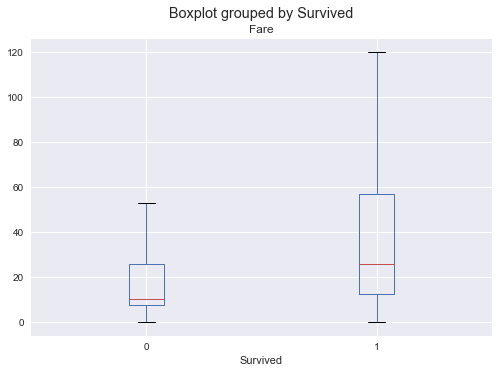

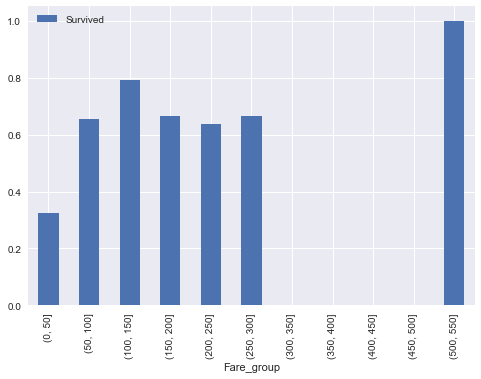

In [165]:
# 生存与票价费用的关系
# 由于不是离散数据应此用图像显示
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(df['Fare'],bins=10)
plt.title('The distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count of People')
# temp=pd.crosstab([df.Fare],df.Survived.astype(bool))
# temp.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)
f_df=df[['Fare','Survived']]
# f_df.groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)
bins = np.arange(0,600,50)
f_df['Fare_group']=pd.cut(f_df['Fare'], bins)
f_df.groupby(['Fare_group','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)
f_df.boxplot('Fare', by='Survived',showfliers = False)
f_df = f_df.drop("Fare",axis=1)
f_df.groupby(['Fare_group']).mean().plot(kind='bar',stacked=True)
plt.show()

说明:根据从票价方面查看生还数量,超过500元的只有一个并且生还了因此有最高的生还率但是属于个体事件异常值,大多数人属于50元以内的票应此在这个区间里的生还率相对最低.

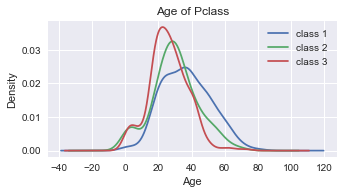

In [166]:
#各个等级客舱的年纪分布
plt.subplot2grid((2,3),(1,0), colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')   
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel(u"Age")# plots an axis lable
plt.ylabel(u"Density") 
plt.title(u"Age of Pclass")
plt.legend((u'class 1', u'class 2',u'class 3'),loc='best') # sets our legend for our graph.
plt.show()

说明:根据表里所示三等舱的年纪分布做小,二等舱的其次,一等舱的年纪最大,样本里的船舱的等级所体现的收入财富等级和年龄有一定的相关性

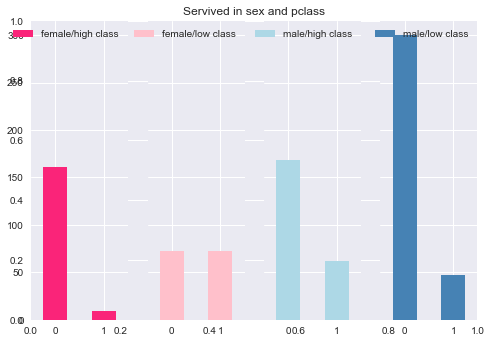

In [167]:
 #各种舱级别情况下各性别的获救情况
fig=plt.figure()
plt.title(u"Servived in sex and pclass")

ax1=fig.add_subplot(141)
df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"0", u"1"], rotation=0)
ax1.legend([u"female/high class"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"0", u"1"], rotation=0)
plt.legend([u"female/low class"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"0", u"1"], rotation=0)
plt.legend([u"male/high class"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"0", u"1"], rotation=0)
plt.legend([u"male/low class"], loc='best')

plt.show()

说明:女性和高级舱位同时具备这两个条件的时候有较高的生还机会,而低等舱位的男性缺有最高的生还失败的数量

In [171]:
# 将字符型的样本数据转换为数值型做关联性计算,获取每个因素所占的相关性比重
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df['Port'] = df['Embarked'].map( {'C': 1, 'S': 2,'Q': 3} ).astype(int)
print df.head()
c_df=df[["Survived", "Pclass","Gender","Age","Fare","Port","Is_family"]]
c_df.corrwith(df['Survived']).sort_values()
# plt.show()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Is_family  Gender  Port  
0      0   7.2500        S          1       1     2  
1      0  71.2833        C          1       0     1  
2      0   7.9250        S          0       0     2  
3      0  53.1000        S          1       0     2  
4      0   8.0500        S          0       1     

Gender      -0.543351
Pclass      -0.338481
Port        -0.125953
Age         -0.059859
Is_family    0.203367
Fare         0.257307
Survived     1.000000
dtype: float64

说明:根据相关性计算最高的影响因素是性别,其次是船舱等级,与船舱等级相关的因素有船票的价格,接下来是是否有家庭成员同行,年龄并没有明显的相关性,上船地点估计由于和客舱位置分配有关系所以也表现出了一定的相关性

In [189]:
# 衍生证明两个问题是否有针对女性和儿童在逃生时有特殊的照顾
# 10岁以下为儿童的平均生还率
# 平均生还率
s_mean=df.Survived.mean()

s_u10=a_df.groupby(['Age_group']).mean().iloc[0]
# 计算年龄分组的生还标准差
s_std=a_df.groupby(['Age_group']).mean().std(ddof=0)
# 计算标准化
print (s_u10-s_mean)/s_std

s_s=s_df.groupby(['Sex']).mean().loc['female']
# 计算性别分组的生还标准差
s_std=s_df.groupby(['Sex']).mean().std(ddof=0)
# 计算标准化
print (s_s-s_mean)/s_std



Survived    1.873516
dtype: float64
Survived    1.295174
dtype: float64


说明:根据样本的t统计计算儿童的生还率和女性的生还率都属于小概率发生有可能存在针对儿童和妇女的逃生照顾,但数据仅仅标明相关性并非因果性

### 结论

数据集中存在的缺失值有三个,Cabin,Age,Embarked
Cabin缺失数据过多如果强行补齐会带来很多的噪音,不利于后期的分析
Age缺失177个可以通过标准差随机数来填补,与真实的数据相比比较难模拟出异常值
Embarked缺失最少直接用众数值来填补,同样与真实值比还是有偏差

titanic船上有3,547名旅客加工作人员以891人的样本来说可以获取一定的相关度规律,但是当从数据分析无法获得因果性而只有相关性  
从样本的数据相关性来考量高级客舱的女性和儿童以及有家人成员的旅客有更大的生还机会